<a href="https://colab.research.google.com/github/tobbyyan-barker/machinelearning111/blob/main/%E9%80%BB%E8%BE%91%E4%BA%8C%E5%80%BC%E5%88%86%E7%B1%BB%E7%BB%83%E4%B9%A0_%E9%B8%A2%E5%B0%BE%E8%8A%B1%E6%95%B0%E6%8D%AE%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(100, 4)
(100,)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

    target  
0        0

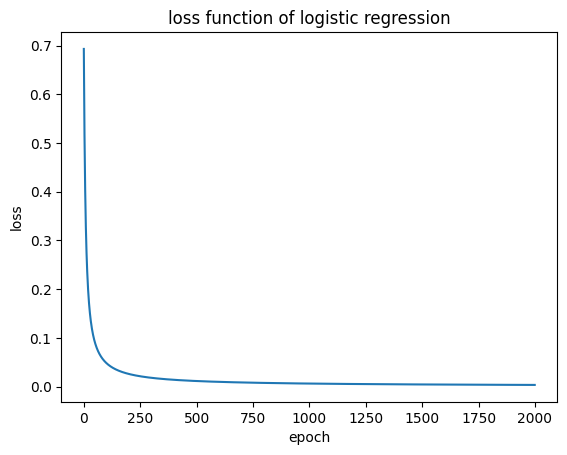

accurancy is 1.0000,recall is 1.0000
precision is 1.0000,specificity is 1.0000


In [10]:
#第一步: 导入相关库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#第二步: 加载数据数据 了解数据特征
iris_data = load_iris()
X = iris_data.data[:100,:]
print(X.shape)
feature = iris_data.feature_names
y = iris_data.target[:100]
print(y.shape)
df = pd.DataFrame(X,columns = feature)
df["target"] = y
print(df)

#第三步: 切分数据 对数据进行切分 80%训练集，20%测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)

#第四步: 标准化X_train, X_test数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_samples,n_features = X_train.shape
#第五步: 转换数据 把y_train 转换成二维数组 方便后续维度处理
y_train = y_train.reshape(-1,1)


#第六步： 定义参数和超参数 和 loss_list表格
w = np.zeros((n_features,1))
b = 0

learning_rate = 0.10
epoches = 2000
previous_loss = float("inf")
tolerance = 1e-7
thershold = 0.5
loss_list = []
pred_list = []
def sigmond(z):
  return 1/(1+np.exp(-z))

#第七步: 开启训练之路
for epoch in range(epoches):
  z = X_train @ w + b
  y_pred = sigmond(z)

  #防止训练初期z太大损失函数出bug 我们用了clip来确保y_pred都落在(0,1)之间，不能取到0和1
  ecllipse = 1e-8
  y_pred_clip = np.clip(y_pred,ecllipse,1-ecllipse)
  loss = -(1/n_samples) * np.sum(y_train * np.log(y_pred_clip) + (1-y_train) * np.log(1-y_pred_clip))
  loss_list.append(loss)
  dw = (1/n_samples) * (X_train.T @ (y_pred - y_train))
  db = (1/n_samples) * np.sum(y_pred - y_train)
  w = w - learning_rate * dw
  b = b - learning_rate * db
  if(abs(previous_loss - loss) < tolerance):
    print(f"function has convergent, loss = {loss:.6f}")
    break
  previous_loss = loss
  if((epoch+1) % 100 ==0):
    print(f"{epoch+1}/{epoches},loss = {loss:.6f} ")
print(f"w is {w},b is {b:.4f} ")

#第八步: 开启画图之路
figure = plt.figure()
plt.plot(range(len(loss_list)),loss_list)
plt.title("loss function of logistic regression")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#第九步: 开始预测之路
z1 = X_test @ w + b
y_pred_test = sigmond(z1)
y_pred_test_flat =y_pred_test.flatten()
for num in y_pred_test_flat:
  if num > thershold:
    num = 1
    pred_list.append(num)
  else:
    num = 0
    pred_list.append(num)

#第十步: 写一个函数寻找四个指标: list1---真实值 list2---预测值
def calculate_four_parameters(list1,list2):
  # 确保传入的都是NumPy数组以便进行向量化比较
  list1 = np.array(list1)
  list2 = np.array(list2).flatten()
  TP = np.sum((list1==1) & (list2==1))
  TN = np.sum((list1==0) & (list2==0))
  FP = np.sum((list1==0) & (list2==1))
  FN = np.sum((list1==1) & (list2==0))
  accurancy = (TP+TN) / (TP+TN+FP+FN) if (TP+TN+FP+FN) >0 else 0
  recall = TP/(TP+FN) if (TP+FN) >0 else 0
  precision = TP/(TP+FP) if (TP+FP) >0 else 0
  specificity = TN/(TN+FP) if (TP+FP) >0 else 0
  print(f"accurancy is {accurancy:.4f},recall is {recall:.4f}")
  print(f"precision is {precision:.4f},specificity is {specificity:.4f}")

#第十一部: 调用函数
calculate_four_parameters(y_test,pred_list)